# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np

### Simulation du lancé de dé

In [2]:
def Roll():
    return int(np.random.choice(range(1,7),1))

In [3]:
Roll()

2

### Compléter le code et commenter

In [23]:
A = 0 #pos pion
NA = 0 #nbr de coup
S = 10 #la longeur du chemin n
temp = Roll()
NA += 1
print('temp = {} | NA = {}' .format(temp,NA))
while temp < 6 :
    temp = Roll()
    NA += 1
    print('temp = {} | NA = {}' .format(temp,NA))
A = 1
print('A = {}' .format(A))
while A < S :
    temp = Roll()
    NA += 1
    if A + temp == S :
        A = S
        print('temp = {} | NA = {} | A = {}' .format(temp,NA,A))
        break
    elif A + temp < S :
        A = A + temp
        print('temp = {} | NA = {} | A = {}' .format(temp,NA,A))
    else :
        print('temp = {} | NA = {} | A = {}' .format(temp,NA,A))        

temp = 2 | NA = 1
temp = 6 | NA = 2
A = 1
temp = 1 | NA = 3 | A = 2
temp = 4 | NA = 4 | A = 6
temp = 4 | NA = 5 | A = 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [28]:
def sim(S):
    A = 0 #pos pion
    NA = 0 #nbr de coup
    temp = Roll()
    NA += 1
    while temp < 6 :
        temp = Roll()
        NA += 1
    A = 1
    while A < S :
        temp = Roll()
        NA += 1
        if A + temp == S :
            A = S
            break
        elif A + temp < S :
            A = A + temp
        else :
            continue
    return NA     

In [33]:
[sim(30) for i in range(5)]

[13, 13, 12, 14, 11]

# Conclusion
Dans la fonction sim(S) simule ces étapes :
- Etape 1 :
la position du pion (A) et le nombre de coups (NA) s'initialisent à 0.
    
- Etape 2 :
Aprés chaque appel de la fonction Roll(), NA s'incrimente et A reste égale à 0 jusqu'à avoir Roll() = 6 où A devient égale à 1.
    
- Etape 3 :
Lorsque A >= 1 si A + Roll() = la langeur du chemin (S) : le jeu s'arrete , si A + Roll() < S : A reçoit la valeur de A + Roll() sinon rien ne se passe et le jeu continue (Notant que a chaque appel de la fonction Roll() NA s'incrimente).
    
- Etape 4 :
la fonction sim(S) renvoit la valeur de NA.
    
Pour Conclure la fonction sim nous permet de determiner NA qui est le nombre de coup fait pour terminer le jeu.

In [35]:
#simulation de n fois
L = [sim(30) for i in range(50000)]
Moy = sum(L) / 50000
print('estimation de la moyenne de X_30 = {}'.format(Moy))

estimation de la moyenne de X_30 = 19.04126


# Conclusion
Aprés la simulation de 50000 fois on peut conclure que la moyenne est toujours présque égale à 19 dans le cas où S = 30.

### Simulation de $10^5$  scénario 

In [36]:
Freq=np.fromiter((sim(20) for i in range(10**5)),dtype=int)

In [37]:
ESP=Freq.sum()/10**5

In [38]:
x=list(range(10,20))

In [39]:
y=[np.fromiter((sim(u) for i in range(5*10**4)),dtype=int).sum()/50000 for u in x]

In [40]:
import matplotlib.pyplot as plt

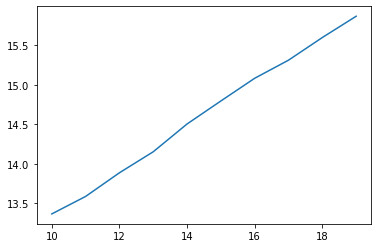

In [41]:
plt.plot(x,y)

In [42]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [43]:
slope

0.2841747878787879

In [44]:
intercept


10.494609575757575

# Conclusion
Aprés la simulation de $10^5$ scénarios et aprés l'analyse du courbe des valeurs de ces scénarios on peut conclure que l'éspérance mathématique d'un jeu de ludo est une fonction linéaire de forme :
                                        $$E(X_n) ~= 0.284 * n + 10.49$$